### ライブラリのインポート・画像読み込み

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

base = cv2.imread("base.jpg", 0).astype(np.float64)

im = cv2.imread("park.jpg", 0).astype(np.float64)
mask = cv2.imread("mask.jpg", 0).astype(np.float64)

### 画素値の正規化

In [3]:
H,W = im.shape

mean_b = base.mean()
std_b = base.std()

mean = im.mean()
std = im.std()

out_b = (base - mean_b) / std_b * 30 + 128
out = (im - mean) / std * 30 + 128

### 背景差分・二値化

In [4]:
im2 = np.zeros((H,W)).astype(np.uint8)

for h in range(H):
    for w in range(W):
        if mask[h,w] == 0:
            pass
        else:
            im2[h,w] += np.abs(int(out[h,w]) - int(out_b[h,w]))
        
th = 40

for h in range(H):
    for w in range(W):
        if im2[h,w] >= th:
            im2[h,w] = 255
        else:
            im2[h,w] = 0
                
im2 = im2.astype(np.uint8)

### 車両のみで白で表示される

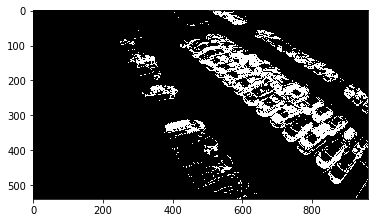

In [5]:
plt.imshow(im2, cmap = "gray")

### 二値化画像をもとにヒートマップ作製

In [6]:
import matplotlib.pyplot as plt

G = 40

ih = int(H/G)
iw = int(W/G)

heatmap = np.zeros((ih, iw)).astype(np.float64)

for h in range(ih):
    for w in range(iw):
        heatmap[h,w] = (int(im2[h*G:(h+1)*G, w*G:(w+1)*G].sum())/int(im2.sum())) * 100
        heatmap.astype(np.uint8)

### ヒートマップ表示

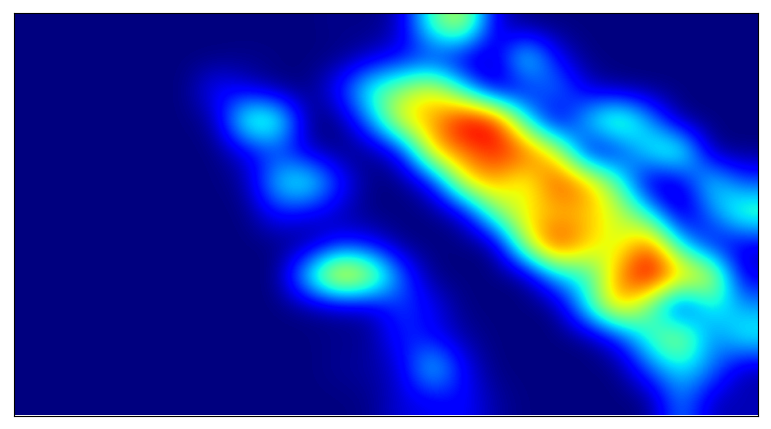

In [7]:
figsize_px = np.array([960, 540])
dpi = 100
figsize_inch = figsize_px / dpi

fig, ax = plt.subplots(figsize=figsize_inch, dpi=dpi)

plt.tick_params(labelbottom=False,
                labelleft=False,
                labelright=False,
                labeltop=False)
plt.tick_params(bottom=False,
                left=False,
                right=False,
                top=False)

plt.imshow(heatmap, cmap = "jet", interpolation="bicubic")